# Modeling Home Prices Using A Multiple Linear Regression Model 

**Chris Machado**


# Index

- [Abstract](#Abstract)
- [1. Introduction](#1.-Introduction)
- [2. The Data](#2.-The-Data)
    - [2.1 Import the Data](#2.1-Import-the-Data)
    - [2.2 Data Exploration](#2.2-Data-Exploration)
    - [2.3 Data Preparation](#2.3-Data-Preparation)
        - [2.3.1 Preparing Descriptive Data](#2.3.1-Preparing-Descriptive-Data)
        - [2.3.2 Preparing Numeric Data](#2.3.2-Preparing-Numeric-Data)
    - [2.4 Correlation](#2.4-Correlation)
- [3. Project Description](#3.-Project-Description)
    - [3.1 Linear Regression](#3.1-Linear-Regression)
    - [3.2 Analysis](#3.2-Analysis)
    - [3.3 Results](#3.3-Results)
    - [3.4 Verify Your Model Against Test Data](#3.4-Verify-Your-Model-Against-Test-Data)
- [Conclusion](#Conclusion)
- [References](#References)

[Back to top](#Index)


##  Abstract

Home valuations are a topic of deep interest for those in the market to either purchase or sell a house. Each property is unique with countless combinations of differing features, such as location, age, and construction materials. All of these factors can affect the total value. But negotiating a fair price can be speculative without a deeper understanding of the local market, and how each of a dwelling's features contribute to its market value. 

In this analysis, I propose a solution to this problem through statistical methods on a sample population. The dataset was provided by Dr. John Williams of the Massachusetts Institute of Technology, containing 200 records of home sales in the Boston area. In addition to the sale price, the entries also contained 80 different features describing each property sold. Using Python, and making use of the Scikit-learn library, I developed a multiple linear regression (MLR) model correlating home features with sale price. When subjected to a test dataset, the model was able to predict sale price with over 84% accuracy. 
 


![image](property_worth.jpg)
<h style="text-align: center;">[source](#References)</h>

[Back to top](#Index)


## 1. Introduction

As with any predictive technique, choosing the right model for the dataset is the first step. MLR was chosen initially for two reasons. First, we are only concerned with how each home feature correlates to a home’s value. Secondly, a visual examination of plots comparing the two variables show either a liner relationship or none at all. 

With 80 columns of data for each sale, there is no surprise discovering much was unusable at first. A great deal of time was spent cleaning the data by removing sparsely populated columns, transforming qualitative data into numerical format, and dealing with null or zero values.

After scrubbing the dataset, I determined which columns provided skill for training the model. Using pandas built in correlation function I quantified my earlier visual examination into a pairwise correlation matrix. Correlation values range from -1 to 1, describing the weight each independent variable has on the dependent variable, with 1 being perfectly correlated, and -1 perfectly inversely correlated.

With the largest correlation coefficients identified, the several models were built using Scikit-learn’s linear regression function.  Both *prediction* and *score* methods generated sample predictions and the coefficient of determination, a measure of each models ability to accurately predict an outcome. 

Finally, a separate portion of the dataset was applied to test each models skill at predicting the sale price before selecting the best model. 

[Back to top](#Index)

## 2. The Data




### 2.1 Import the Data

To begin work, the appropriate python libraries were imported. During the analysis, I worked almost exclusively with pandas dataframes and numpy objects. The linear regression tools were imported from the SciKit-learn (sklearn) library. Both Seaborn and Matplotlib also came in handy for visualizing results.

The dataset used was provided in two comma separated values (csv) files. The [first file](houseSmallData.csv) contains records of 100 transactions used as a training set for the model to learn from. The [second file](jtest.csv) contains another 100 entries from the same community used exclusively to test the formulated model. Each were imported as a dataframe with pandas “read_csv” function. A [description file](data_description.txt) is provided to decrypt column titles and the information contained. 

In [1]:
# Import libraries and dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model

trainData = pd.read_csv('houseSmallData.csv', index_col=0)
testData = pd.read_csv('jtest.csv', index_col=0)

[Back to top](#Index)

### 2.2 Data Exploration
Examining the dataframe’s head, a few things immediately jump out as problematic. Quite a few values are null and others are all zeros. Both require further examination. The other issue is differing data types. Some columns contain numerical values, essential for deeper analysis. The remaining columns contain descriptive values, and must be converted into numbers to derive insight. 

```trainData.head()```
![image](raw_df.jpg)

Using pandas *corr* method, I generated Pearson correlation coefficients to understand the relationship each column has to sales price. 

The Pearson correlation coefficient, *r*, is a measure of linear correlation between two sets of data, defined as:
$$r = \frac{1}{N-1}\sum^n_{i=1}\frac{x_i-\bar{x}}{\sigma_x}\frac{y_i-\bar{y}}{\sigma_y}$$

where $\bar{x}$ and $\bar{y}$ are the mean, and $\sigma_x$ and $\sigma_y$ are the standard deviation. Specifically, I wanted to identify the five most positive and negatively correlated coefficients.


In [2]:
# Find the five most positively correlated and negatively correlated data to sale price
# Note the "SalePrice" is perfectly correlated with itself and not of interest, also "Id" is an index, not a real measuremetnt
pos_corr = trainData.corr()['SalePrice'].sort_values(ascending=False)[0:6]
neg_corr = trainData.corr()['SalePrice'].sort_values()[0:6] 
print(pos_corr)
print(neg_corr)

SalePrice      1.000000
OverallQual    0.855061
GrLivArea      0.735129
GarageArea     0.688249
GarageCars     0.663441
YearBuilt      0.658636
Name: SalePrice, dtype: float64
YrSold          -0.262683
KitchenAbvGr    -0.235659
EnclosedPorch   -0.233483
OverallCond     -0.170443
Id              -0.162735
LowQualFinSF    -0.150027
Name: SalePrice, dtype: float64


Note above how the value for *SalePrice* is 1. That is expected since any variable is perfectly correlated to itself. The five positive values associated with *overall quality, above ground living area, garage size, number of cars per garage,* and *year built* are all greater than $0.65$, indicating a significant correlation between these variables and the sale price. Whereas the negative values are all closer to $0$ than $-1$, suggesting these variables are uncorrelated or weakly inversely correlated. Another clue is how “Id,” intended to be used as an index, appears in the result.

Using Seaborn’s pairplot, a graphical representation is presented comparing the ten variables identified above as it relates to sale price.   

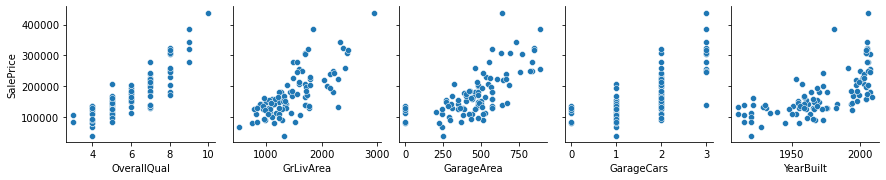

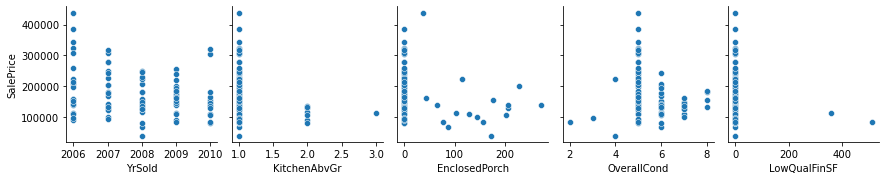

In [3]:
# Plot the top five most correlated variables using seaborn.pairplot
sns.pairplot(trainData, x_vars=['OverallQual', 'GrLivArea','GarageArea','GarageCars','YearBuilt',], 
             y_vars=['SalePrice'] )
sns.pairplot(trainData, x_vars=['YrSold', 'KitchenAbvGr','EnclosedPorch','OverallCond','LowQualFinSF',], 
             y_vars=['SalePrice'] )

The scatter plots reinforce the previous speculation. A distinct linear correlation appears in the top charts. However, the bottom five show a lot of variation in these data, and a negative correlation trend is difficult to discern. The exception being the year sold, and a weak inverse relationship appears. 

The trend observed in year sold is counterintuitive, since inflation is expected increase prices over time. But placed in the historical context, 2006 to 2010 marked the peak of the housing boom and subsequent recession where home valuations across the country experienced a significant decline. This is an important point to remember when designing a predictive model. Valuations are expected to increase beyond 2010, and the unusual market forces may negatively skew the results.  

[Back to top](#Index)

### 2.3 Data Preparation

Given the bifurcation in data types, a divide and conquer strategy seemed appropriate. The dataframe’s columns were grouped into separate variables, one containing numerical values and the other categorical data. Since columns were identical, and knowing that I would need to clean and format both files, I chose to merge the two datasets and work with one large dataframe.

In [4]:
# Combine both training and test datasets
allData = pd.concat([trainData, testData])

# Separate data as numeric vs descriptive and identify dependent variable y
numData = allData.select_dtypes(include=[np.number]).copy() 
desData = allData.select_dtypes(exclude=[np.number]).copy()

[Back to top](#Index)
#### 2.3.1 Preparing Descriptive Data 

Preparing the descriptive component took place in two parts. First deal with missing values, then translate strings into numerical objects through one-hot encoding. Resolving null or empty values first is required before moving on to the conversion. Use of the *isna* and *sum* methods made this step straightforward. In this case, sums of 0 are uninteresting and excluded accordingly.   

In [5]:
# Identify missing values from the descriptive data, sorting by the number missing per column
nulls = pd.DataFrame(desData.isna().sum().sort_values(ascending=False)) 
nulls = nulls[nulls.values > 0]
#nulls

<img style="float: left;" src="desc_null.png"/>

</br></br>
Of the 200 samples, attributes *Pool Quality, Alley* and *Miscellaneous Feature* contain ten or less entries (i.e. <= 5%). Granted our training sample is reduced 100, at best we could expect <= 10%. No statistical insight will be derived from these columns, and they are dropped accordingly.

While *Fence Quality* and *Fireplace Quality* are distinctively data sparse, 25% and 50% respectively, there could be information of value lost if hastily deleted. It is also perfectly feasible for half the houses to contain fireplaces, and even 25% maintaining fences in densely populated urban areas like Boston. 

The remaining 9 columns contain significantly fewer missing values. Four are related to the garage and five to the basement. Of those subcategories, each have the same number of missing values, strongly suggesting each of the 15 missing garage data points are linked to the same 15 homes. The same is true for the basements. After deeper inspection, there is not a single *NA* entry in either column to signal a home doesn’t have a garage or basement.

For all the above reasons, *NA* was chosen to be inserted using the *fillna* function. 

In [6]:
# Drop the Pool Quality, Alley and Misc Feature collumns completely 
desData.drop(['PoolQC','Alley', 'MiscFeature'], axis=1, inplace=True)

# Assumed that some houses don't have garages, basements, fences, or fireplaces. Fill these entries with 'NA'
desData.fillna('NA', inplace=True)

Converting descriptive data into numeric is essential before a predictive model can use the information. This is accomplished by transforming all possible values *n* within a column of size *m* rows, into an *m x n* matrix, representing categories by use of $1$ or $0$. Pandas function *get_dummies* was used to make the conversion.

Careful examination of both columns and values was required to achieve the intended output. Three categories (proximity to conditions, exterior covering, and basement finish type) had a second column to allow two selections of possible options. For example, a property could be located next to both a railroad and arterial street. Or a house’s exterior covering would likely consist of both plywood and asphalt shingles. I used the pop method to remove the original columns, followed by the zip function to combine the two possibilities into a single list, stored as a column in the original descriptive dataframe before encoding.


In [7]:
# Combine multiple descriptive features of the same type into a single column
desData['ProximityCond'] = list(zip(desData.pop('Condition1'), desData.pop('Condition2')))
desData['Exterior'] = list(zip(desData.pop('Exterior1st'), desData.pop('Exterior2nd')))
desData['BasemntFinType'] = list(zip(desData.pop('BsmtFinType1'), desData.pop('BsmtFinType2')))

# Transform jiberish into something my wife cant decode
encoded = pd.get_dummies(desData, prefix=desData.columns)

<img style="float: right;" src="one_hot.png"/>


Another consideration was the reuse of descriptive words characterizing different elements of the property. For instance, a home’s exterior condition is rated as either *Ex, Gd, TA, Fa,* and  *Po* to mean excellent, good, average, fair, and poor respectively. However, both basement conditions and heating quality use the same nomenclature to describe completely separate and unrelated things. 

By default *get_dummies* transposes descriptive entries to column headers in the new matrix. If the options are unique, no big deal. But if they are reused, information is lost in the process. Fortunately, you will get an error alerting you, should you decide to try. The issue is easily resolved, however, by use of the prefix option. In this case, the original column name was added as a prefix to each descriptive possibility, thus ensuring information is retained and each column is unique.   

[Back to top](#Index)
#### 2.3.2 Preparing Numeric Data


The numeric data preparation was handled in a similar way as the descriptive, only without the need to encode. In a similar fashion, empty values were identified and examined. But unlike the descriptive set, excessive zeros were also examined as erroneous or insignificant sample size to identify accurate correlations. Columns consisting of more than 20 (10%) non-zero numbers were retained. All else were dropped.    

In [8]:
# Identify missing values from the numeric data, sorting by the number missing per column
nulls = pd.DataFrame(numData.isna().sum().sort_values(ascending=False)) 
nulls = nulls[nulls.values > 0]


# Identify zeros as a proxy for datasparse columns where samples < 20
zeros = (numData == 0).sum().sort_values(ascending=False)
zeros = pd.DataFrame(zeros[zeros.values > 180])
#nulls.head()
#zeros


<img style="float: left;" src="num_zeros.png"/> 

<img style="float: right;" src="num_null.png"/>

Using the zeros dataframe, a for loop quickly dropped the sparsely populated columns. The null values required a little more digging to determine how they should be resolved. *LotFrontage* quantifies the distance a road runs along the property. Depending how the recorder chose to interpret this measurement could skew the results. Every lot should have an access road and associated length, even if its only the width of the road. Although some might argue that an extended gravel driveway running through another property doesn’t count. It all comes back to the intent the measurement was designed to capture. In any case, 36 missing values seems suspiciously high to attribute to categorization errors. As a result I felt confident inserting the mean of the included 164 measurements would skew the results too far.

The year a garage was built contains 15 missing values. With a little inspection, those are confirmed to correspond to the same 15 properties discovered earlier in the descriptive dataframe. These data, or lack thereof, strongly suggest the dwelling is without a garage. However, given this is a column of integers, *“NA”* won’t work as it did previously. Substituting the average year as a placeholder would inject bias. Alternatively, using zero to represent “*NA*” introduces 15 outliers, since the range is from 1900 to 2009, thus heavily skewing any correlation. I reason that no garage is approximately equivalent to the oldest. Compromising, I chose to use the columns minimum value (1900) as a placeholder.

In [9]:
for feature in zeros.index:                      # Delete all columns with excessive zeros
    numData.drop(feature, axis=1, inplace=True)

numData['LotFrontage'].fillna(numData['LotFrontage'].mean(), inplace=True)  #Fill LotFrontage NaN with average
numData['GarageYrBlt'].fillna(numData['GarageYrBlt'].min(), inplace=True)   #Fill GarageYrBuilt with minimum value

To finalize the cleaning process, I reassembled the numeric dataframe with the descriptive, now encoded, dataframe. Then I split the frame back into training and test sets.  

In [10]:
cleanData = pd.concat([numData, encoded], axis=1) # Recombine numeric and categorical data

# Separate into training and test sets
trainData = cleanData.iloc[0:100,1:]   
testData = cleanData.iloc[100:200,1:]

[Back to top](#Index)

### 2.4 Correlation

Now that dataset is thoroughly scrubbed, we can reexamine Pearson correlation coefficients: 

In [11]:
# Find Pearson correlation coefficients and sort by most correlated, drop NaN's
corrValues = trainData.corr()['SalePrice'].sort_values(ascending=False)
corrValues.dropna(inplace=True)

# Examine the 15 most correlated and 15 most inversely correlated variables
print(corrValues.head(16))
print(corrValues.tail(15).sort_values())

SalePrice         1.000000
OverallQual       0.855061
GrLivArea         0.735129
GarageArea        0.688249
BsmtQual_Ex       0.680094
GarageCars        0.663441
YearBuilt         0.658636
TotalBsmtSF       0.616297
GarageYrBlt       0.605092
FireplaceQu_Gd    0.593375
FullBath          0.579505
MasVnrArea        0.571836
TotRmsAbvGrd      0.553603
1stFlrSF          0.550912
YearRemodAdd      0.548330
ExterQual_Gd      0.534426
Name: SalePrice, dtype: float64
ExterQual_TA        -0.658471
GarageFinish_Unf    -0.560271
FireplaceQu_NA      -0.555472
MasVnrType_None     -0.544772
BsmtQual_TA         -0.540463
KitchenQual_TA      -0.527989
HeatingQC_TA        -0.414756
GarageType_Detchd   -0.407360
CentralAir_N        -0.366800
MSZoning_RM         -0.354476
Foundation_BrkTil   -0.309571
RoofMatl_CompShg    -0.295297
BsmtExposure_No     -0.293862
Fence_MnPrv         -0.286890
PavedDrive_N        -0.282686
Name: SalePrice, dtype: float64


Now that categorical data is encoded, several more key variables emerge showing correlation with sale price. Basement height in excess of 99 inches emerges as the fourth most correlated variable. Similarly, inversely correlated variables are now apparent.  

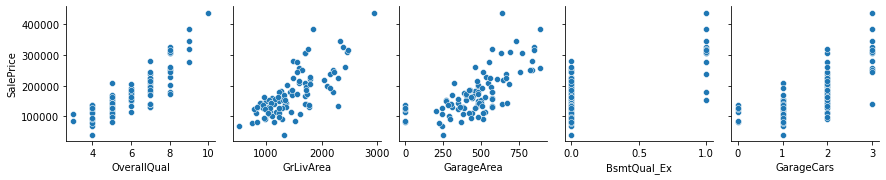

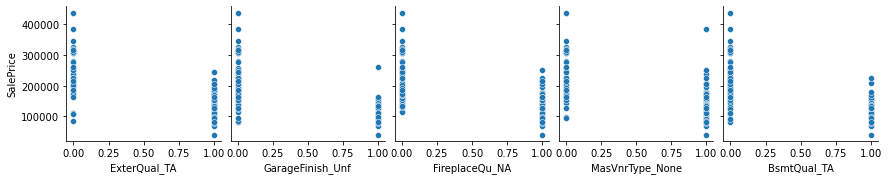

In [12]:

sns.pairplot(trainData, x_vars=['OverallQual', 'GrLivArea','GarageArea','BsmtQual_Ex','GarageCars',], y_vars=['SalePrice'] )
sns.pairplot(trainData, x_vars=['ExterQual_TA', 'GarageFinish_Unf','FireplaceQu_NA','MasVnrType_None','BsmtQual_TA',], y_vars=['SalePrice'] )

Plotting the top five positive and negative correlated variables again shows clear linear relationships. Each of these would be ideal to incorporate into a predictive model. 


[Back to top](#Index)

## 3. Project Description

Before providing the dataset for this project, Dr. Williams presented a simple linear regression model using only “Overall Quality” and “Above Ground Living Area.” These variables represent the two most correlated to sale price as depicted above. The simple model showed that 75% of the sale price was predicted by these two alone.

By delving deeper into each variable, I looked at the pearson correlation coefficient and evaluated how each affected model performance. I was able to improve the MLR model through the addition of both correlated and inversely correlated variables.

[Back to top](#Index)

### 3.1 Linear Regression

Linear regression is finding the line of best fit through a plot of data consisting of a single independent and dependent variable in the form:

$$y=mx+b$$

Where m is the weight (or slope) and b is the bias, each given by:

$$m=\frac{n{\sum}xy-{\sum}x{\sum}y}{n{\sum}x^2-({\sum}x)^2}$$


$$b=\frac{{\sum}y-m{\sum}x}{n}$$


Multiple linear regression is an extension to the simplified version above. If multiple independent variables exist, each affecting the same dependent variable, then all can be combined forming an *n-1* dimensional linear equation in the form:

$$y=m_1x_1+m_2x_2+m_3x_3+...+m_nx_n + b$$

The SciKit-learn library contains a linear regression model that performs the above calculations. The train data is first separated into X and Y components, X represented as the columns believed to correlate with Y, the sale price. A model is built and learns from the train data provided. It can then make predictions and score itself by calculating the coefficient  of determination $R^2$. The coefficient of determination is a meaure of the proportion of all independent variables have on the dependent variable.  

[Back to top](#Index)

### 3.2 Analysis 

First, I separated my independent variables X, and defined Y as sale price for both the train and test sets. Next, I defined a function “*build_model*” to create a MLR model, knowing I would be using it frequently. 

In [13]:
train_X = cleanData.head(100)            # Establish the training set
train_Y = train_X.pop('SalePrice')

test_X = cleanData.tail(100)             # Establish the test set
test_Y = test_X.pop('SalePrice')

# build_model creates a linear regression model, and returns the model, model score (R^2), and a set of predictions 
#                X_df - dataframe of independent variables
#                Y_df - dataframe of dependent variable
#                X_cols - list or dataframe specifying columns from X_df used in model
#                log (optional) - Boolean, defalt False, computes log of Y_df before training the model
def build_model (X_df, Y_df, X_cols, log=False):        
    
    if log:                                             
        Y_df = np.log(Y_df)                             
    X = X_df[X_cols]                                    

    lin_reg = linear_model.LinearRegression()
    model = lin_reg.fit(X, Y_df)
    predictions = model.predict(X)
    model_score = model.score(X, Y_df)
    
    return model, model_score, predictions  

*build_model* requires three arguments an X and Y dataframe, as well as specified columns for X to be included for model training. It also returns three objects, the model, value of $R^2$, and a set of predictions.

I included an optional argument *log* based on an observation of the sale price data. When plotted as a histogram, the price doesn’t appear normally distributed, but rather resembles a logarithmic distribution. For best results, model training should done with a normalized sample.  Taking the log of sale price helps to normalize these data and make ready for training.       


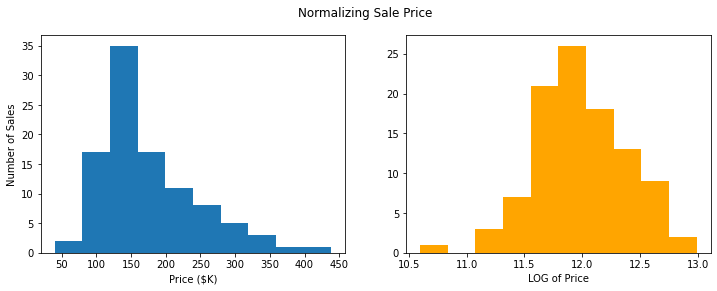

In [14]:
# Create two histogram plots: the first showing sale price, the other showing normalized log of sale price 
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
fig.suptitle('Normalizing Sale Price')
ax1.hist(train_Y/1000, bins=10,) # Divide by 100 for readability
ax1.set_xlabel('Price ($K)')
ax1.set_ylabel('Number of Sales')
ax2.hist(np.log(train_Y), bins=10, color='orange')
ax2.set_xlabel('LOG of Price')
plt.show()

I was curious to see how the addition each independent variable affected the model’s $R^2$ value. To identify the best independent variables for the model, I referred to the sorted Pearson correlation coefficients derived earlier. I took the top 50 (most correlated), bottom 50 (most negatively correlated), and the top 50 from the absolute values (combination of both positively and inversely correlated). For each case, I iterated through adding an additional variable to the model and recording the value for *R^2*. 

In [15]:
posCorr = pd.Series([],dtype=float)   
negCorr = pd.Series([],dtype=float)
comboCorr = pd.Series([],dtype=float)

for i in range(2,52):
    mod1, posCorr[i-1], predict1 = build_model(train_X, train_Y, corrValues[1:i].index, log=True)

for i in range(-50,0):  
    mod2, negCorr[abs(i)], predict1 = build_model(train_X, train_Y, corrValues[i:].index, log=True)
    
for i in range(2,52):
    mod3, comboCorr[i-1], predict1 = build_model(train_X, train_Y, corrValues.abs().sort_values(ascending=False)[1:i].index, log=True)

Now plot the results...

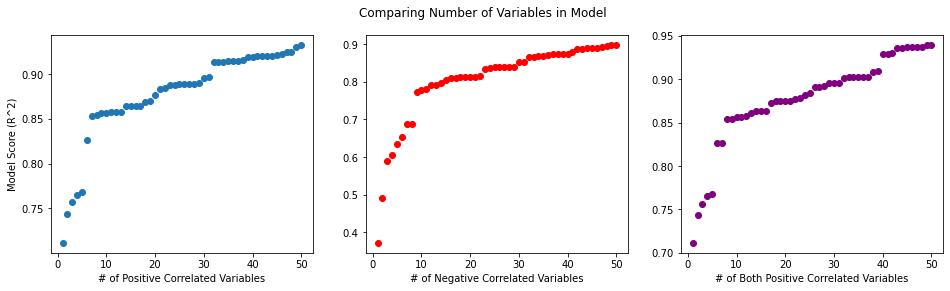

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(16,4))
fig.suptitle('Comparing Number of Variables in Model')
ax1.scatter(posCorr.index, posCorr.values)
ax1.set_xlabel('# of Positive Correlated Variables')
ax1.set_ylabel('Model Score (R^2)')
ax2.scatter(negCorr.index, negCorr.values, color='red')
ax2.set_xlabel('# of Negative Correlated Variables')
ax3.scatter(comboCorr.index, comboCorr.values, color='purple')
ax3.set_xlabel('# of Both Positive Correlated Variables')
plt.show()

The variables with the highest (or least) Pearson coefficients were added first. It is no surprise then to see significant improvement in the model with only 7 to 10 variables. Beyond that number, additional variables only provide meager gains to model skill. 

Another observation are stepwise increases in model skill from range 10 to 50. It appears certain variables, when added, provide disproportionate gains to model skill compared to variables with similar correlation coefficients.     

### Building 4 Prototypes
Given the above observations, I decided limit my variables to 15. However, deciding which to choose required the construction of several prototypes. 

The first consisted of the 15 highest correlated variables. The second included the top 15 when absolute values from negatively correlated coefficients were included. The third was a split, 7 most correlated, 7 most inversely correlated, and one hand selection - *CentralAir_N*. The above graph showed a significant improvement in model score when *CentralAir_N* was added. 

The fourth and last model is a variation on the third. Noting that *MasVnrType_BrkFace* and *ExterQual_Gd* provided the stepwise jump in model performance, while *GarageCars* did not, I added the former and dropped the latter. Okay, that makes 16, but let's see what happens.  

In [17]:
# First define which columns to include with each model
cols_1 = corrValues[1:16].index
cols_2 = corrValues.abs().sort_values(ascending=False)[1:16].index
cols_3 = list(corrValues[1:8].index) + list(corrValues[-7:].index) + ['CentralAir_N']
cols_4 = cols_3.copy() + ['MasVnrType_BrkFace', 'ExterQual_Gd']
cols_4.remove('GarageCars')

# Create each model using specified variables above
model_1, score_1, predictions_1 = build_model(train_X, train_Y, cols_1, log=True)
model_2, score_2, predictions_2 = build_model(train_X, train_Y, cols_2, log=True)
model_3, score_3, predictions_3 = build_model(train_X, train_Y, cols_3, log=True)
model_4, score_4, predictions_4 = build_model(train_X, train_Y, cols_4, log=True)

# Consolidate prediction data into a dataframe
predictions = pd.DataFrame({'Model 1': np.exp(predictions_1), 'Model 2': np.exp(predictions_2), 
                            'Model 3': np.exp(predictions_3), 'Model 4': np.exp(predictions_4),})
predictions = pd.concat([predictions, train_Y.copy()], axis=1)

[Back to top](#Index)

### 3.3 Results

Print $R^2$ values for each model, then plot predictions:

        Model 1 R^2:         Model 2 R^2:         Model 3 R^2:        Model 4 R^2: 
        0.8645732988820213   0.8633532195015332   0.894929890399539   0.8971690253619482


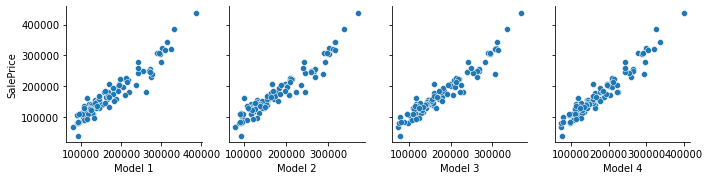

In [18]:
sns.pairplot(predictions, x_vars=['Model 1', 'Model 2','Model 3','Model 4'], y_vars=['SalePrice'] )
print(f'        Model 1 R^2:         Model 2 R^2:         Model 3 R^2:        Model 4 R^2: \n        {score_1}   {score_2}   {score_3}   {score_4}')

Each of the models performed well, and predictions show a strong linear relationship. Model 1 performed marginally better than model 2 around 86%. It was a suprise model 2 did not have a performance boost through incorporating strongly inverse correlated variables. 

Models 3 and 4 show significant improvement over 1 and 2, just under 90%. But they too, only exibit marginal difference when compared to each other. Model 4 has a slight edge over 3. Perhaps the extra variable made the difference.  

[Back to top](#Index)

### 3.4 Verify Models Against Test Data

Now for the real test. Using the test dataset, I introduce records the models have not yet seen. This should verify the accuracy of each model's ability to predict the sale price. Then using the actual sale price, score its performance.  

In [19]:
# Using test data inject the appropriate variable and make predictions for the sale price
predict_1 = model_1.predict(test_X[cols_1])
predict_2 = model_2.predict(test_X[cols_2])
predict_3 = model_3.predict(test_X[cols_3])
predict_4 = model_4.predict(test_X[cols_4])

# Using the known sale price, score how well the model performs
test_score_1 = model_1.score(test_X[cols_1], np.log(test_Y)) # Don't forget transform price into log(price) 
test_score_2 = model_2.score(test_X[cols_2], np.log(test_Y)) # that our model depends on
test_score_3 = model_3.score(test_X[cols_3], np.log(test_Y))
test_score_4 = model_4.score(test_X[cols_4], np.log(test_Y))

# Consolidate predictions into a single dataframe transforming log(price) back to original format through exp()
predict = pd.DataFrame({'Model 1': np.exp(predict_1), 'Model 2': np.exp(predict_2), 
                            'Model 3': np.exp(predict_3), 'Model 4': np.exp(predict_4),})
predict.set_index(np.arange(100,200), inplace=True)      # the index is 0-99, but need to change back to 100-200 to
predict = pd.concat([predict, test_Y.copy()], axis=1)    # concatenate the sale price from test_Y

Print and plot results as before:

        Model 1 R^2:         Model 2 R^2:         Model 3 R^2:        Model 4 R^2: 
        0.8211712172704936   0.8108906667431167   0.8437022446727329  0.843584201011079


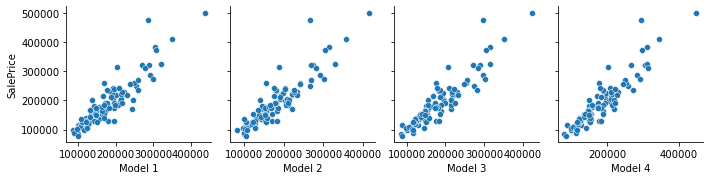

In [20]:
sns.pairplot(predict, x_vars=['Model 1', 'Model 2','Model 3','Model 4'], y_vars=['SalePrice'] )
print(f'        Model 1 R^2:         Model 2 R^2:         Model 3 R^2:        Model 4 R^2: \n        {test_score_1}   {test_score_2}   {test_score_3}  {test_score_4}')

The results look pretty good with each performing slightly lower than expected. Each model shows clear linear correlation with performance above 81%. The expected performance coinsides with our observations made above. Model slightly outperforms 2, 82% vs 81%. Model 3 and 4 show performance gains over 1 and 2, with an 84% accuracy rate. Although this time the accuracy for model 3 and 4 are nearly identical. The extra variable didn't make a difference. Model 3 is winner, and the one I would use to make further predictions in an operational environment.   

[Back to top](#Index)

## Conclusion

The initial look at the dataset showed that without repairing and formating, a decent MLR model could be built with just a handful of numeric variables. However reparing missing or invalid entries and encoding the qualitative data was critical in fine tuning the model making for the most accurate predictions.

In this example, I showed that is is possible to analyze historical home sale records, then use that data to train a model and predict home sale prices with 84% accuracy. The linear correlation between a property's features and market value enables such models to work.  

Although the model created arms the user with confident predictions, it's worth noting that the housing market is inherently dynamic. Population changes, housing availability, fashonable syles, and other economic variables fluxuate with time. Every good model needs periodic maintenance to account for these changes. Otherwise they will slowly deteriorate becoming less accurate with each sucessive year.    




[Back to top](#Index
)
## References
- Agarwal, Animesh. “Linear Regression using Python.” Medium. (2018)  https://towardsdatascience.com/linear-regression-using-python-b136c91bf0a2


- Pedregosa, F.,  Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., Blondel, M., Prettenhofer, P., Weiss, R., Dubourg, V., Vanderplas, J., Passos, A., Cournapeau, D., Brucher, M., Perrot, M. Duchesnay, E. “Scikit-learn: Machine Learning in Python.” JMLR, Vol 12. (2011) pp. 2825-2830.


- Radovanovic, Igor. “Sklearn – An Introduction Guide To Machine Learning.” Algotraining101. (2021). https://algotrading101.com/learn/sklearn-guide/


- LaMorte, Wayne. “The Role Of Probability – Central Limit Theorem.” Boston University of Public Health. (2016). https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_probability/BS704_Probability12.html


- McKinney, Wess and Kluyver, Thomas. “Pandas: Powerful Python Data Analysis Toolkit.” Version 1.4.3. The Pandas Development Team. (2022). https://pandas.pydata.org/docs/pandas.pdf


- Pedregosa, F.,  Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., Blondel, M., Prettenhofer, P., Weiss, R., Dubourg, V., Vanderplas, J., Passos, A., Cournapeau, D., Brucher, M., Perrot, M. Duchesnay, E. “Scikit-learn: Machine Learning in Python.” JMLR, Vol 12. (2011) pp. 2825-2830.


- Radovanovic, Igor. “Sklearn – An Introduction Guide To Machine Learning.” Algotraining101. (2021). https://algotrading101.com/learn/sklearn-guide/


- Image 
[Next Horizon Homes](https://scontent-iad3-2.xx.fbcdn.net/v/t1.6435-9/93232542_158625378954633_4228564623407710208_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=106&ccb=1-7&_nc_sid=110474&_nc_ohc=U0evikGiEHYAX8zAuBM&_nc_ht=scontent-iad3-2.xx&oh=00_AT8eQ8yOPfaX3BgoSdDUyeuJJM8OTTtOG2ImCXKy_FZzlg&oe=62F619AE)
